## This project makes use of the Movie Database provided at the Udacity classroom project. I followed standard procedure with reading the data, cleaning it, exploring it, and visualizing my findings. 

## At the beginning of my work I had a few questions:
## 1. How many movies of each genre had been produced since 1966?
## 2. What is the relation between the budget used to produce a film, the revenue gained from the movie, and the popularity of the movie?
## 3. I suspect that movies with more runtime would require more budget to sustain, I delved deeper to check if that was true.
## 4. I wanted to check if the average score of a film is related to its revenue, I suspect they are related.

In [17]:
#Importing needed libraries
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import scipy
from scipy import stats

#Reading the dataset
df=pd.read_csv('tmdb-movies.csv')



In [18]:
#Cleaning process

#1. Fixing the different date formats issue
def adjust_dates(x):
    date = x['release_date'].split('/')
    if int(date[-1]) != x['release_year']:
        date[-1] = str(x['release_year'])
        x['release_date'] = '/'.join(date)
    return x
df = df.apply(adjust_dates, axis=1)
df['release_date'] = pd.to_datetime(df['release_date'])

#2. Dropping unneeded columns
df.drop(['id', 'imdb_id', 'homepage', 'tagline', 'overview', 'production_companies', 'budget', 'revenue', 'keywords'], axis=1, inplace=True)
#3. Since the missing values are in the cast, genres, and directors, it is safe to drop them.
df.dropna(inplace = True)
#4. Replacing the missing values (labeled as 0) in the revenue and budget columns with the mean of each one.
mean_revenue = df['revenue_adj'].mean()
mean_budget = df['budget_adj'].mean()
df['revenue_adj'] = df['revenue_adj'].replace({0:mean_revenue})
df['budget_adj'] = df['budget_adj'].replace({0:mean_budget})

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10866 entries, 0 to 10865
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   popularity      10866 non-null  float64       
 1   original_title  10866 non-null  object        
 2   cast            10790 non-null  object        
 3   director        10822 non-null  object        
 4   runtime         10866 non-null  int64         
 5   genres          10843 non-null  object        
 6   release_date    10866 non-null  datetime64[ns]
 7   vote_count      10866 non-null  int64         
 8   vote_average    10866 non-null  float64       
 9   release_year    10866 non-null  int64         
 10  budget_adj      10866 non-null  float64       
 11  revenue_adj     10866 non-null  float64       
dtypes: datetime64[ns](1), float64(4), int64(3), object(4)
memory usage: 1018.8+ KB


In [35]:


#Exploring the data:
#1. Normalizing the revenue and budget values.
dfr = df['revenue_adj']
dfb = df['budget_adj']
df['revenue_adj'] = (dfr-dfr.min())/(dfr.max()-dfr.min())
df['budget_adj'] = (dfb-dfb.min())/(dfb.max()-dfb.min())
#2. Normalizing the popularity values.
df['popularity'] = (df['popularity']-df['popularity'].min())/(df['popularity'].max() - df['popularity'].min())
#3. Preserving only the first value of genres column as it is the main genre of the movie.
df['genres'] = df['genres'].str.split('|', expand=True)[0]

df.sample(20)

,popularity,original_title,cast,director,runtime,genres,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
8846,0.002376,Jalla! Jalla!,Fares Fares|Torkel Petersson|Tuva Novotny|Lale...,Josef Fares,88,Comedy,2000-12-22,10,6.1,2000,0.041803,0.018394
5985,0.003190,Justin Bieber's Believe,Justin Bieber|Scooter Braun|Ryan Good|Usher Ra...,Jon M. Chu,92,Documentary,2013-12-19,52,7.5,2013,0.041803,0.018394
3625,0.013025,Another Happy Day,Ellen Barkin|Ezra Miller|Kate Bosworth|Demi Mo...,Sam Levinson,119,Comedy,2011-11-18,19,6.1,2011,0.009124,0.000122
2388,0.001749,What if...,Kevin Sorbo|Kristy Swanson,Dallas Jenkins,111,Drama,2010-08-20,13,6.5,2010,0.041803,0.018394
6640,0.025466,Nacho Libre,Jack Black|Ana de la Reguera|HÃ©ctor JimÃ©nez|...,Jared Hess,92,Comedy,2006-06-16,214,5.5,2006,0.081443,0.030684
1197,0.003953,Teen Lust,Cary Elwes|Emmanuelle Vaugier|Kristin Bauer va...,Blaine Thurier,80,Comedy,2014-09-04,12,4.3,2014,0.041803,0.018394
3065,0.014325,"Angus, Thongs and Perfect Snogging",Georgia Groome|Eleanor Tomlinson|Aaron Taylor-...,Gurinder Chadha,100,Comedy,2008-07-25,146,6.5,2008,0.063543,0.018394
1324,0.000124,Humpty Sharma Ki Dulhania,Varun Dhawan|Alia Bhatt|Ashutosh Rana|Siddhart...,Shashank Khaitan,133,Drama,2014-07-11,23,6.4,2014,0.041803,0.018394
7159,0.009348,Suspect Zero,Carrie-Anne Moss|Aaron Eckhart|Ben Kingsley|Ha...,E. Elias Merhige,99,Crime,2004-08-27,42,5.1,2004,0.073341,0.005308
4434,0.035849,Paperman,John Kahrs|Kari Wahlgren|Jeff Turley|Jack Gold...,John Kahrs,7,Animation,2012-11-02,507,8.0,2012,0.041803,0.018394


In [87]:
#Insights

#1. Measuring how many profitable movies of our original dataset.
df['Success'] = df.where(df['revenue_adj'] > df['budget_adj'])
df_test = df['Success']
df_test.dropna(inplace=True)
df_test

0                 1
3          0.338721
4          0.282997
8          0.224461
16         0.174306
            ...    
10819    0.00134868
10820       0.03721
10841    0.00802584
10855    0.00426968
10865    0.00108323
Name: Success, Length: 1269, dtype: object

### From this boolean masking of movies where the revenue exceeds the budget. We get that our original dataset of 10866 reduces to only 1269 movies. A great indicator that not all movies are successful.

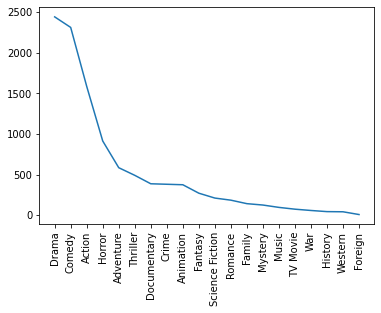

In [90]:
%matplotlib inline
plt.plot(range(1,21), df['genres'].value_counts());
plt.xticks(range(1,21), df['genres'].value_counts().index.array, rotation = 90);

### From the plot we can see that the top 5 prevailing genres are, in order; Drama, Comedy, Action, Horror, and Adventure

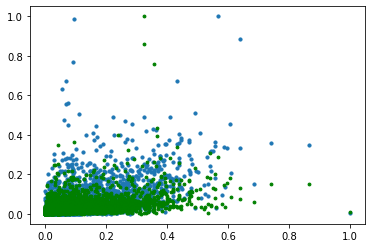

In [70]:
plt.scatter(df['budget_adj'], df['revenue_adj'], s=10)
plt.scatter(df['budget_adj'], df['popularity'],s=8, c='g')

### From the plot we can notice that generally popularity and revenue increase with the budget to a certain threshold (around 0.5 on the normalized scale). Beyond this value, budget does not play that major of a role. 

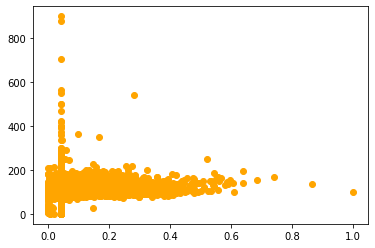

In [73]:
plt.scatter(df['budget_adj'], df['runtime'], c='orange')

### I suspected that movies with higher runtime would need a higher budget to sustain. However, this plot proved me wrong, noticing that movies with high runtime are way below average on the budget axis. With the highest budget going to a movie with less than 200 minutes of runtime.

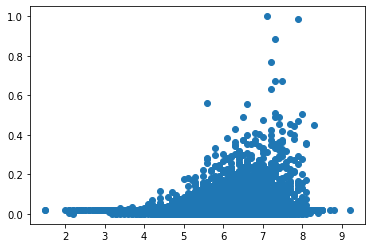

In [91]:
plt.scatter(df['vote_average'], df['revenue_adj'])

### Average votes and the revenue are directly proportional, with the revenue of a movie increasing as the average scored measured by the fans increases, as hypothesized.